In [74]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn import preprocessing

In [75]:
df = pd.read_csv('Classification.csv')

In [76]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,4,1,6,3,3,2,2,2,2


In [77]:
not_required = ['EmployeeCount', 'EmployeeNumber', 'Age', 'MonthlyIncome', 'TotalWorkingYears']
df.drop(not_required,inplace=True, axis=1)
df.head(1)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,11,3,1,0,0,1,6,4,0,5


In [78]:
from sklearn.preprocessing import LabelEncoder as le
le = preprocessing.LabelEncoder()
df['Attrition'] = le.fit_transform(df.Attrition.values)
df['BusinessTravel'] = le.fit_transform(df.BusinessTravel.values)
df['Department'] = le.fit_transform(df.Department.values)
df['EducationField'] = le.fit_transform(df.EducationField.values)
df['Gender'] = le.fit_transform(df.Gender.values)
df['JobRole'] = le.fit_transform(df.JobRole.values)
df['MaritalStatus'] = le.fit_transform(df.MaritalStatus.values)
df['OverTime'] = le.fit_transform(df.OverTime.values)

In [79]:
x = df.drop('Attrition', axis =1)
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [80]:
y= df['Attrition']

In [81]:
x.head(2)

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,2,1,2,1,2,0,94,3,...,11,3,1,0,0,1,6,4,0,5
1,1,279,1,8,1,1,3,1,61,2,...,23,4,4,1,3,3,10,7,1,7


### Test Error

In [82]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
print(type(x_train))
print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import preprocessing

clf = GaussianNB()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print(classification_report(y_test,y_pred))
print(matthews_corrcoef(y_test,y_pred))
print(cm)
clf.score(x_test, y_test)

             precision    recall  f1-score   support

          0       0.89      0.92      0.91       245
          1       0.54      0.45      0.49        49

avg / total       0.83      0.84      0.84       294

0.39958042199435123
[[226  19]
 [ 27  22]]


0.8435374149659864

### Train Error

In [91]:
clf2=GaussianNB()
clf2.fit(x,y)
yhat = clf2.predict(x)
cm = confusion_matrix(y, yhat)

print(classification_report(y,yhat))
print(matthews_corrcoef(y,yhat))
print(cm)
clf2.score(x, y)

             precision    recall  f1-score   support

          0       0.90      0.93      0.91      1233
          1       0.56      0.48      0.51       237

avg / total       0.85      0.86      0.85      1470

0.4321740699322384
[[1144   89]
 [ 124  113]]


0.8551020408163266

### Cross Validation

In [68]:
from sklearn.model_selection import KFold
from sklearn import metrics

actuals=[]
probs=[]
hats=[]
x = np.array(x)
y= np.array(y)
kfold = KFold(n_splits=5, shuffle=True, random_state = 10)
for train_index, test_index in kfold.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    foldhats = clf.predict(X_test)
    foldprobs = clf.predict_proba(X_test)[:,1] # Class probability estimates for ROC curve
    actuals = np.append(actuals, y_test) #Combine targets, then probs, and then predictions from each fold
    probs = np.append(probs, foldprobs)
    hats = np.append(hats, foldhats)

print (metrics.accuracy_score(actuals, hats))
print (classification_report(actuals, hats))
cm = confusion_matrix(actuals,hats)
print (cm)

0.8489795918367347
             precision    recall  f1-score   support

        0.0       0.90      0.92      0.91      1233
        1.0       0.54      0.46      0.50       237

avg / total       0.84      0.85      0.84      1470

[[1138   95]
 [ 127  110]]


Area under the ROC curve : 0.767279


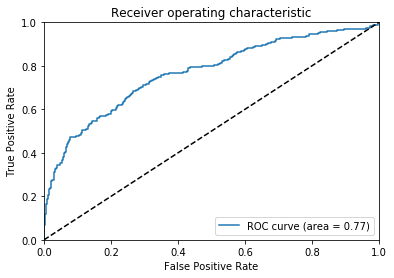

In [89]:
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(actuals, probs)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
ROC(y_test,foldprobs)